In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("E:/filehandling/globalterrorism.csv",encoding = "ISO-8859-1", engine = 'python')

C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df=df[['eventid','iyear', 'imonth', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound','suicide']]

# Rename Operation

In [6]:
df.rename(columns={'imonth': 'Month',
 'iyear': 'Year',
 'eventid': 'Event ID',
 'country_txt': 'Country',
 'region_txt': 'Region',
 'provstate': 'State',
 'city': 'City',
 'attacktype1_txt': 'Attack type',
 'targtype1_txt': 'TargetType',
 'natlty1_txt': 'Nationality',
 'gname': 'Terrorist Group',
 'weaptype1_txt': 'Weapon type',
 'weapsubtype1_txt': 'Weapon subtype',
 'nkill': 'Killed',
 'nwound': 'Wounded'},inplace=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
df['Casualties']=df['Killed']+df['Wounded']

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# No of attacks in India

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

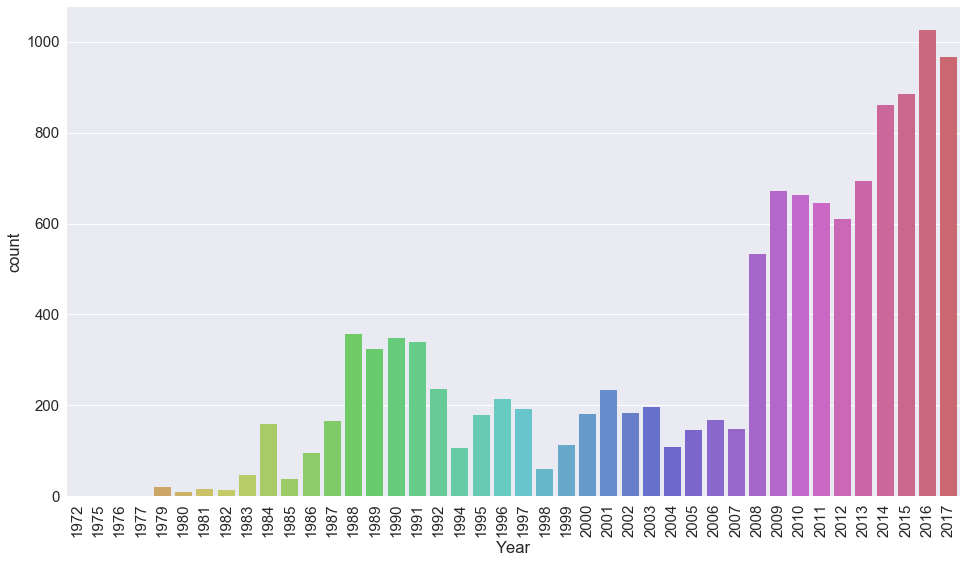

In [37]:
#no of attacks in india
india = df[df['Country']=='India']
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=india, palette='hls')
plt.xticks(rotation=90)

# Most affected Cities in India

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

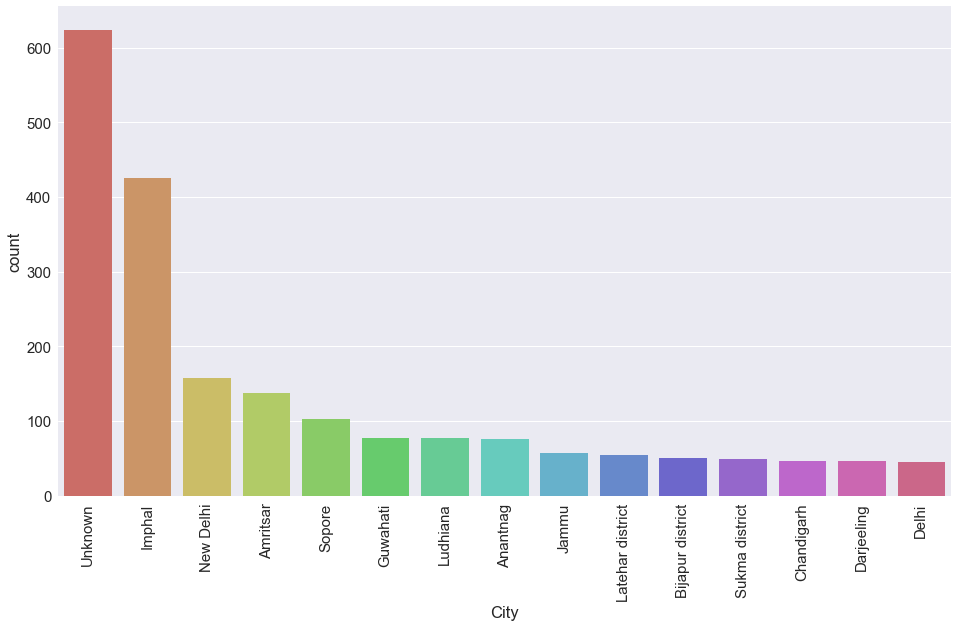

In [61]:
plt.figure(figsize=(16,9))
sns.countplot(x='City', data=india, palette='hls', order=india['City'].value_counts()[1:16].index)
plt.xticks(rotation=90)

# Most active Terror Group in India

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

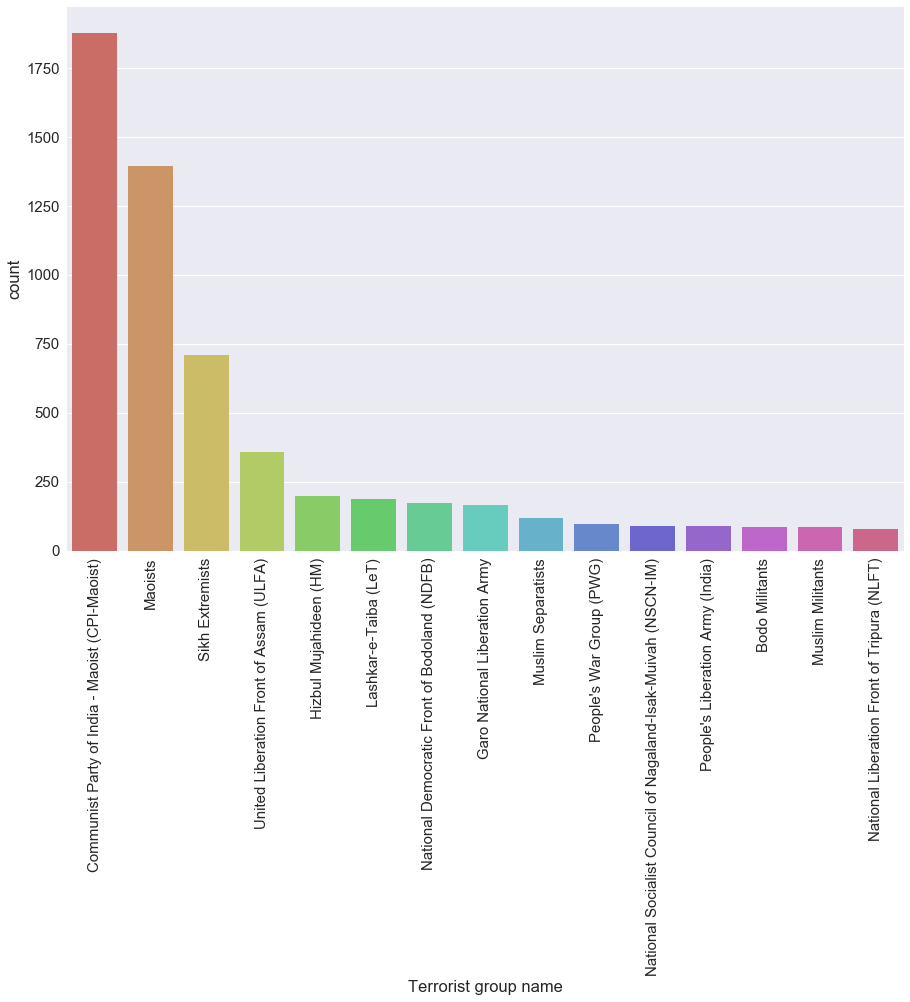

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='Terrorist Group', data=india, palette='hls', order=india['Terrorist Group'].value_counts()[1:16].index)
plt.xlabel('Terrorist group name')
plt.setp(ax.get_xticklabels(), rotation=90) 

# No of Attacks Year Wise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

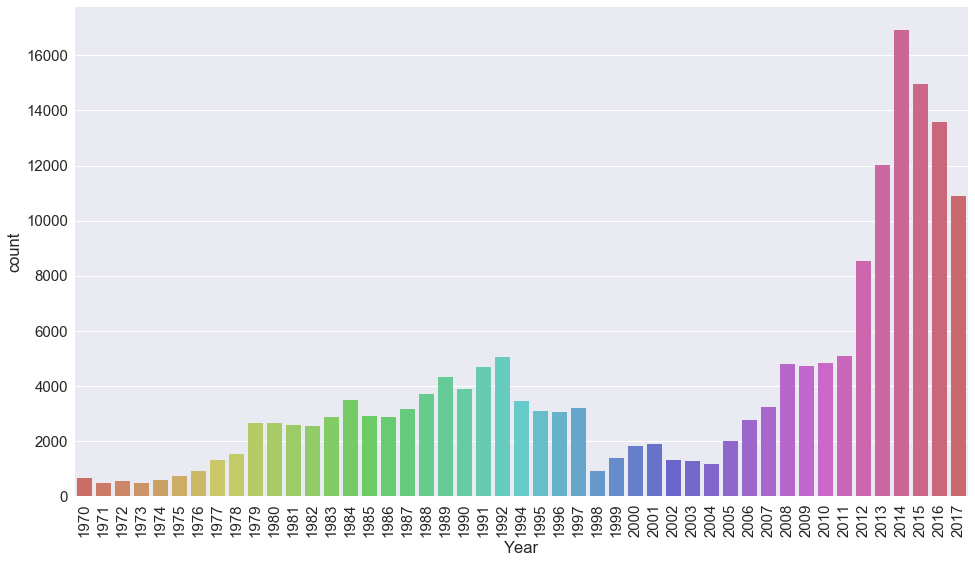

In [19]:
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=df, palette='hls')
plt.xticks(rotation=90)

# Most affected Regions

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


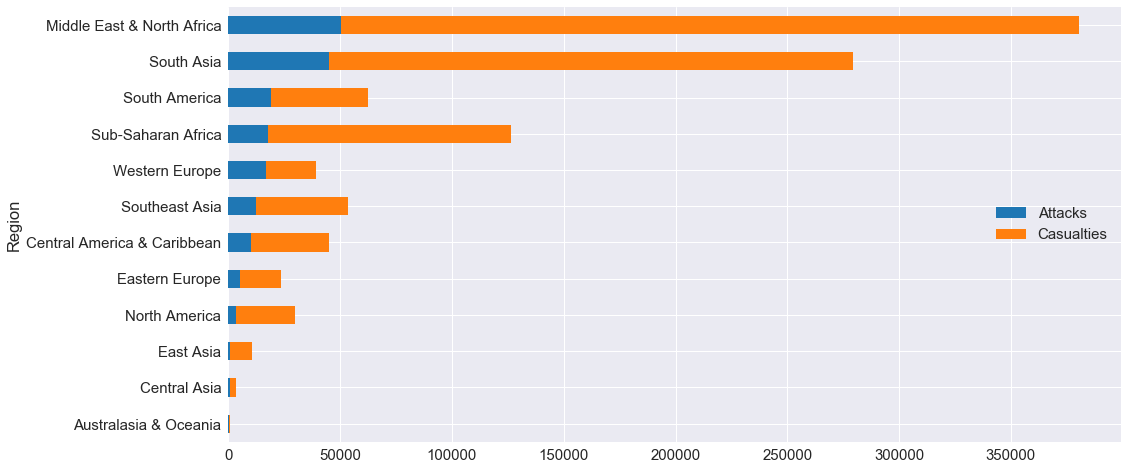

In [17]:
#most affected region 
df['Region'].value_counts(ascending=True).to_frame().reset_index().rename(columns={'index':'Region','Region':'Attacks'}).merge(df[['Casualties','Region']].groupby('Region').sum().reset_index(),on='Region').plot.barh(x='Region',y=['Attacks','Casualties'],figsize=(16,8),stacked=True)
plt.legend(loc=5)

# Most affected countries

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


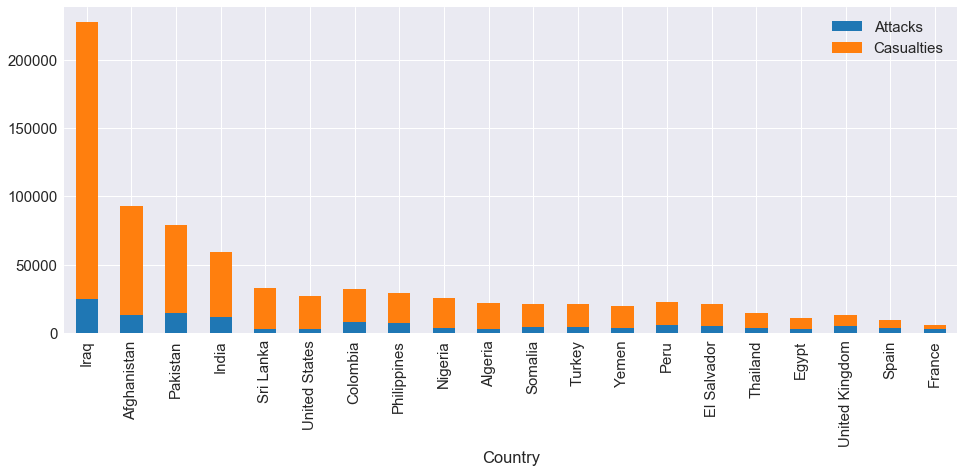

In [18]:
#most affected countries
df[df['Country'].isin(df['Country'].value_counts()[0:20].index)][['Casualties','Country']].groupby('Country').sum().reset_index().sort_values(by='Casualties',ascending=False).merge(df[df['Country'].isin(df['Country'].value_counts()[0:20].index)]['Country'].value_counts().to_frame().reset_index().rename(columns={'index':'Country','Country':'Attacks'}), on='Country').plot.bar(x='Country',y=['Attacks','Casualties'],figsize=(16,6),stacked=True)

# No of successful attacks

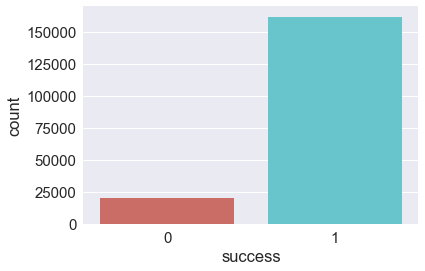

In [37]:
#no of successful attacks 
sns.countplot(x='success', data=df, palette='hls')

# No of suicide attempts

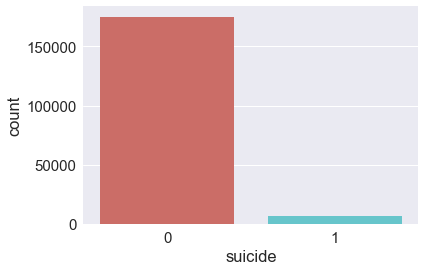

In [26]:
#no of suicide attempts
sns.countplot(x='suicide', data=df, palette='hls')

# No of suicide attempts and successful terror attacks

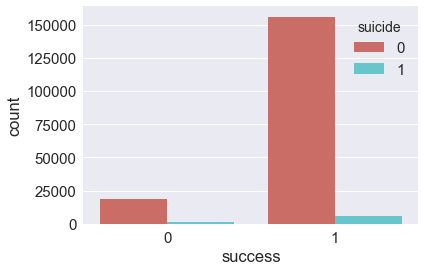

In [38]:
sns.countplot(x='success',hue='suicide',data=df, palette='hls')

# Attack type

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

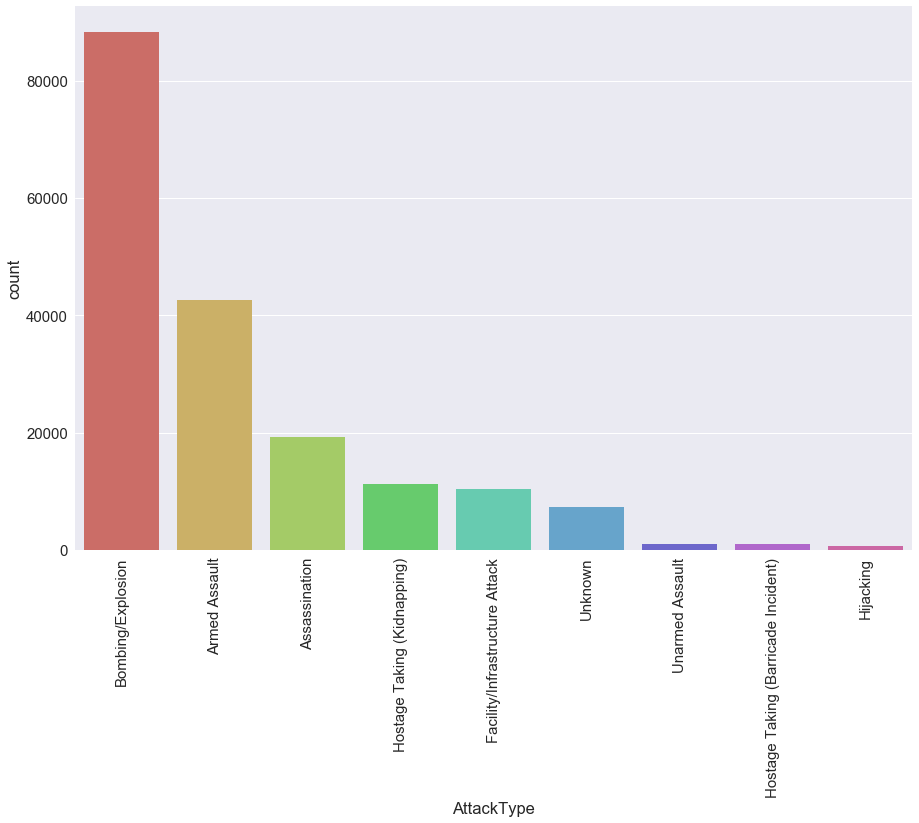

In [48]:
#attack type
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='Attack type', data=df, palette='hls', order=df['Attack type'].value_counts().index)
plt.xlabel('AttackType')
plt.setp(ax.get_xticklabels(), rotation = 90)

# Terrorist group wise

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

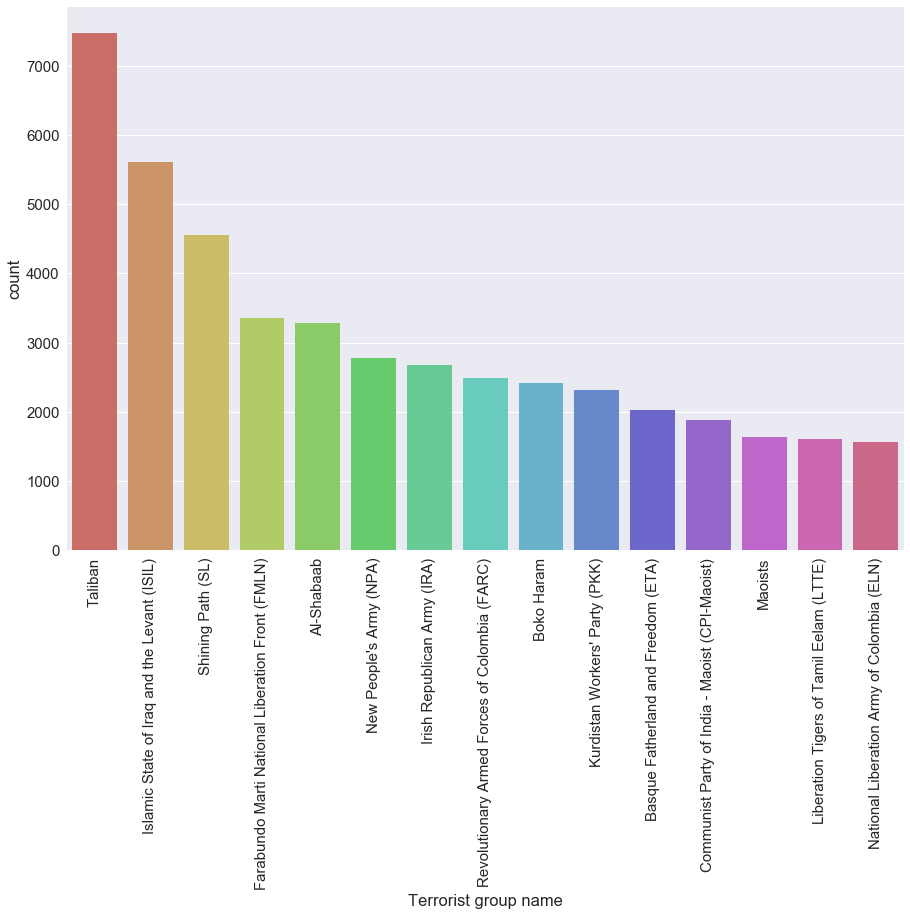

In [42]:
#terrorist group wise
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='Terrorist Group', data=df, palette='hls', order=df['Terrorist Group'].value_counts()[1:16].index)
plt.xlabel('Terrorist group name')
plt.setp(ax.get_xticklabels(), rotation=90) 

In [72]:
clear

In [71]:
clear

# No of attacks in Iraq

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

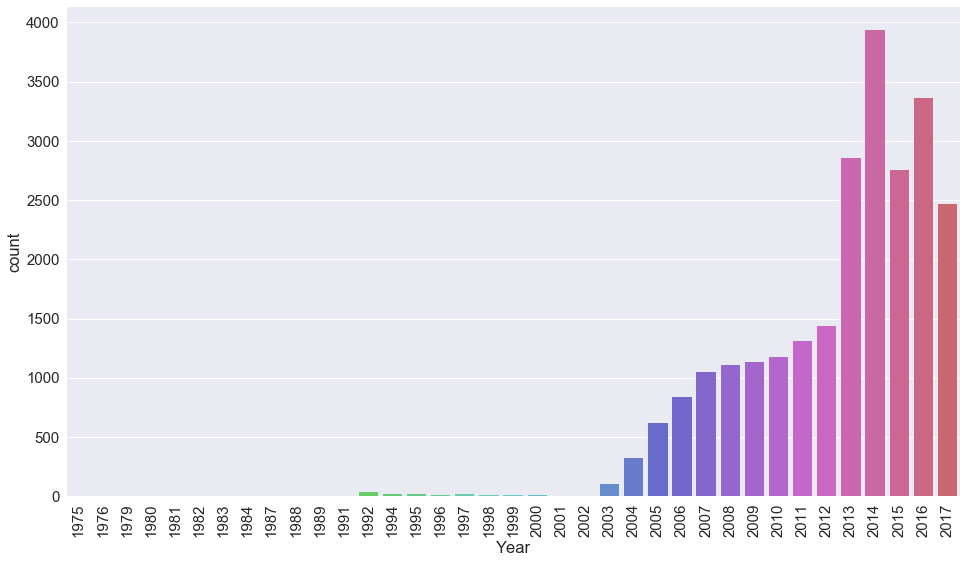

In [21]:
iraq = df[df['Country']=='Iraq']
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=iraq, palette='hls')
plt.xticks(rotation=90)

# Most affected City in Iraq

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

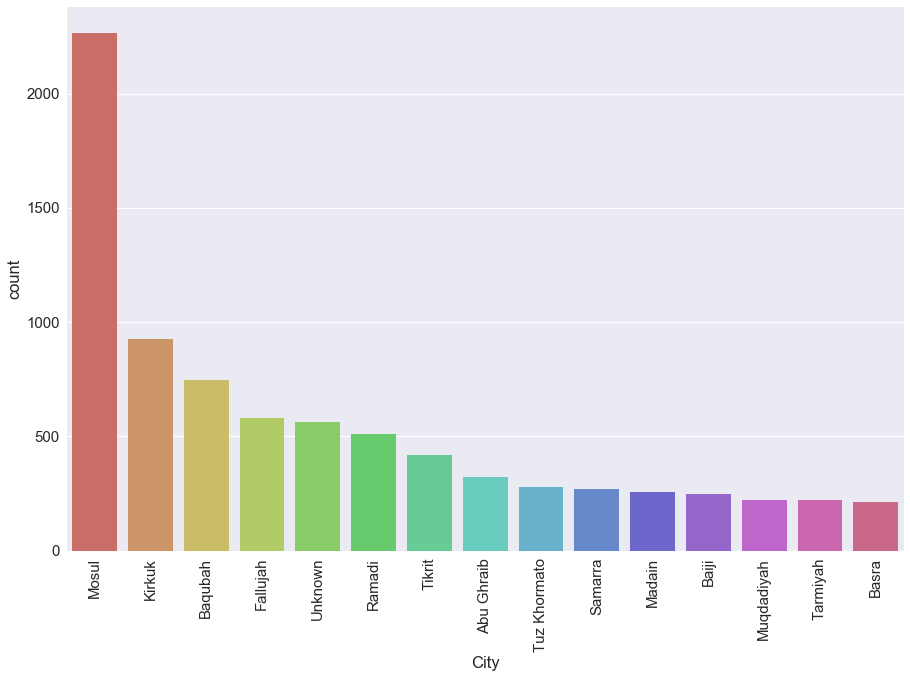

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x='City', data=iraq, palette='hls',order=iraq['City'].value_counts()[1:16].index)
plt.xticks(rotation=90)

# Most active terror group in Iraq

Text(0.5,0,'Terrorist group name')

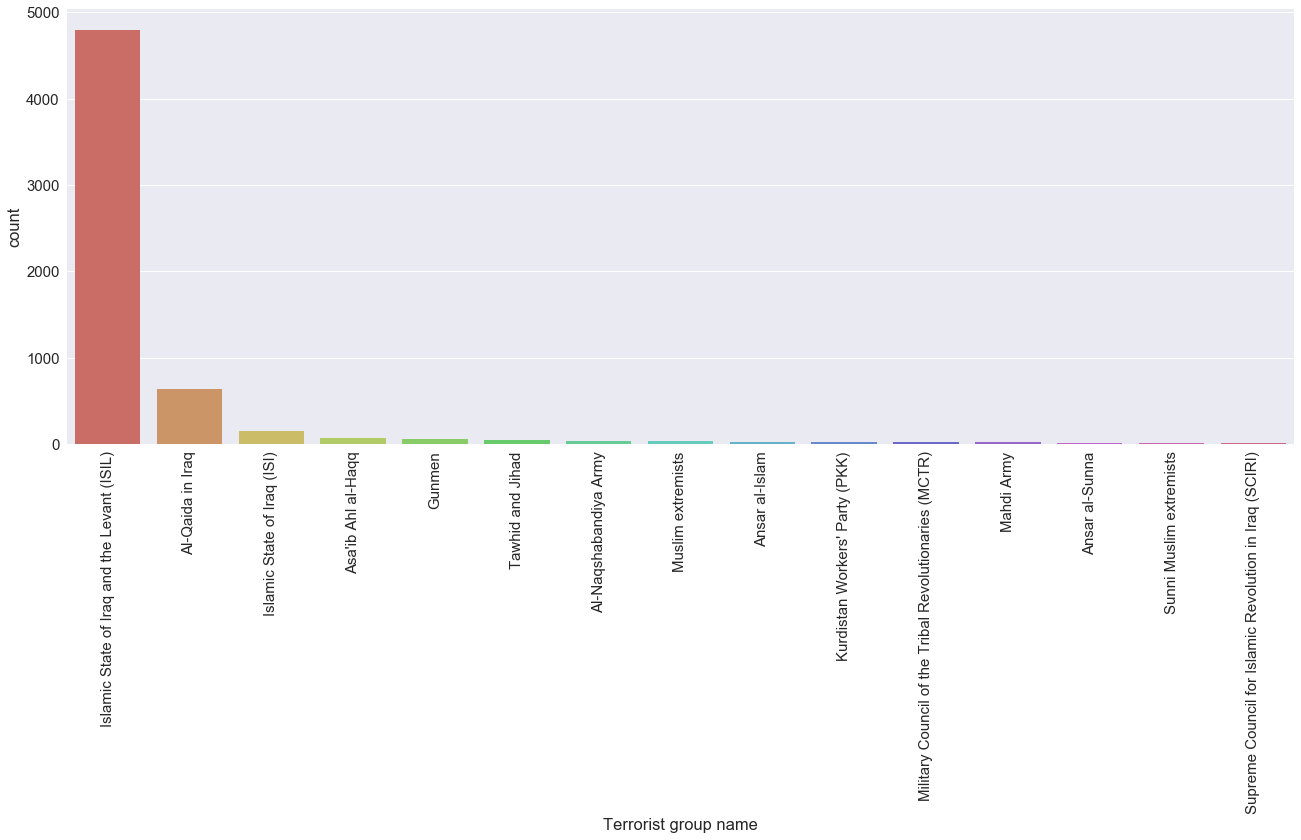

In [44]:
plt.figure(figsize=(22,8))
sns.countplot(x='Terrorist Group', data=iraq, palette='hls',order=iraq['Terrorist Group'].value_counts()[1:16].index)
plt.xticks(rotation=90)
plt.xlabel('Terrorist group name')

# No of attacks in Afghanistan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

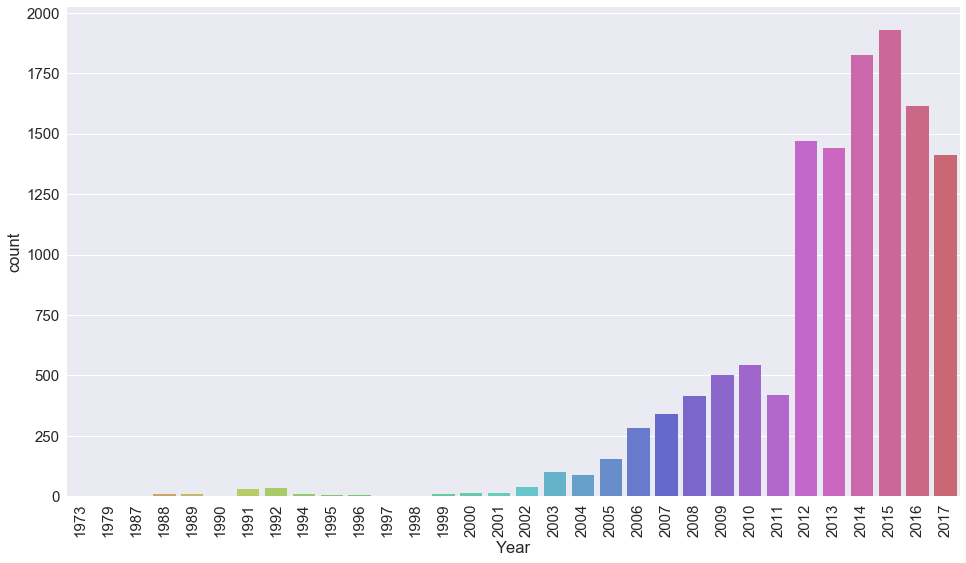

In [30]:
afghanistan= df[df['Country']=='Afghanistan']
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=afghanistan, palette='hls')
plt.xticks(rotation=90)

# Most affected city in Afghanistan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

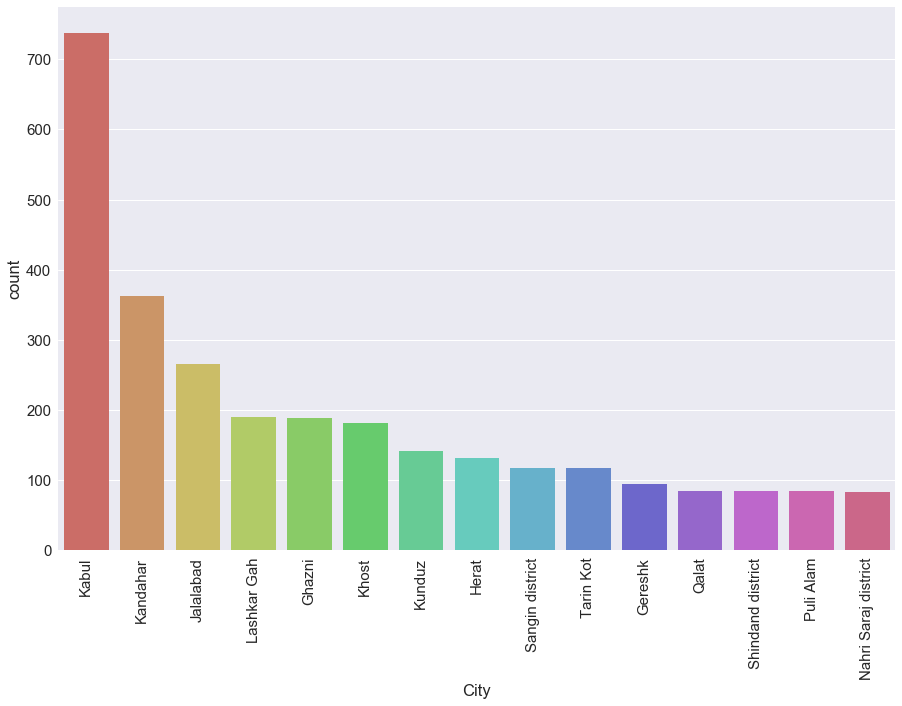

In [69]:
plt.figure(figsize=(15,10))
sns.countplot(x='City', data=afghanistan, palette='hls',order=afghanistan['City'].value_counts()[1:16].index)
plt.xticks(rotation=90)

# Most active terror group in Afghanistan

Text(0.5,0,'Terrorist group name')

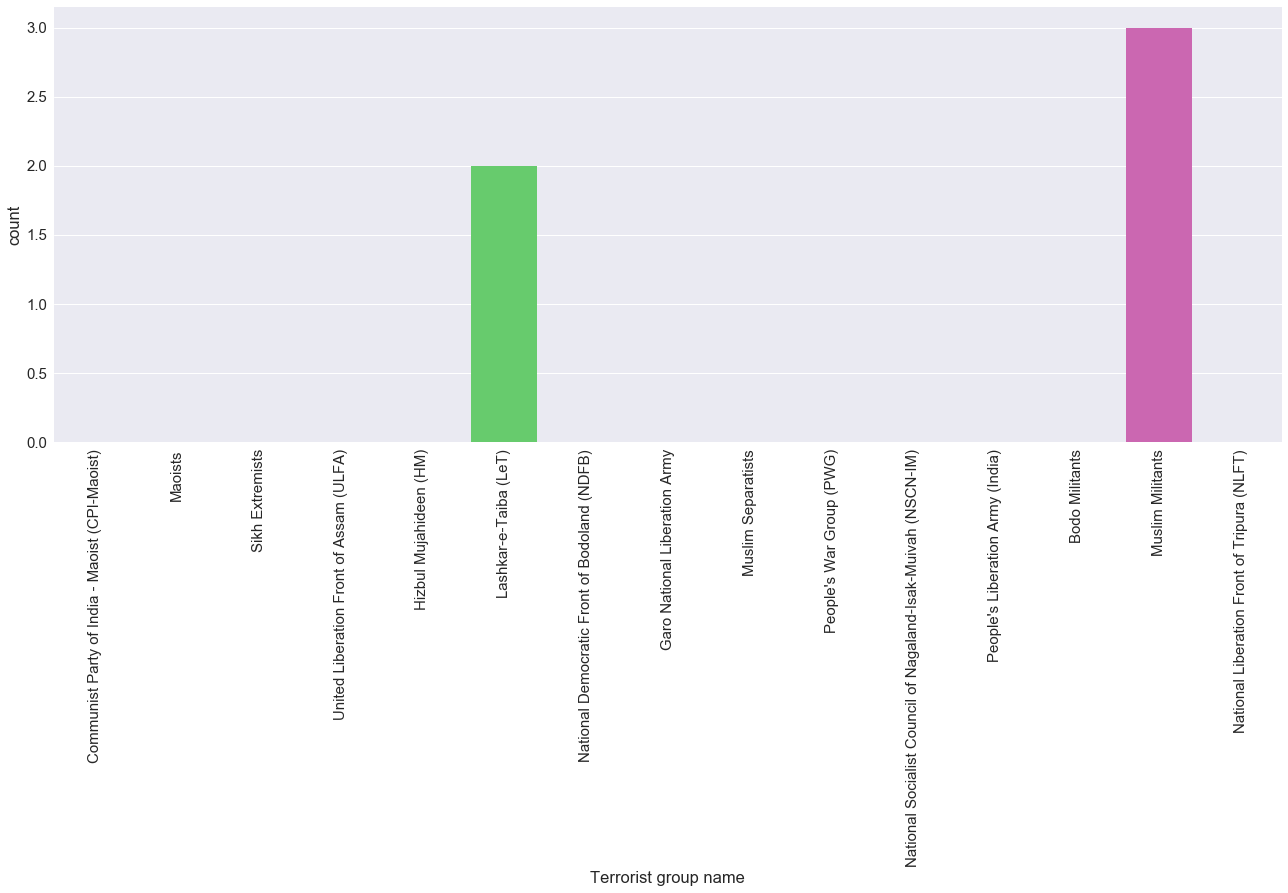

In [45]:
plt.figure(figsize=(22,8))
sns.countplot(x='Terrorist Group', data=afghanistan, palette='hls',order=india['Terrorist Group'].value_counts()[1:16].index)
plt.xticks(rotation=90)
plt.xlabel('Terrorist group name')

# No of attacks in United States of America

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

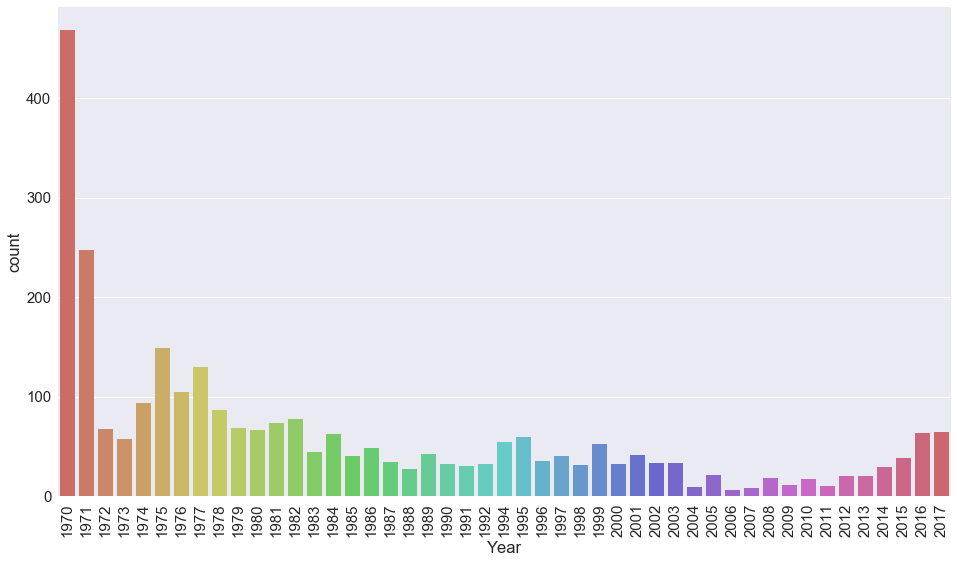

In [32]:
us= df[df['Country']=='United States']
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=us, palette='hls')
plt.xticks(rotation=90)

# Most Affected City in United States

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

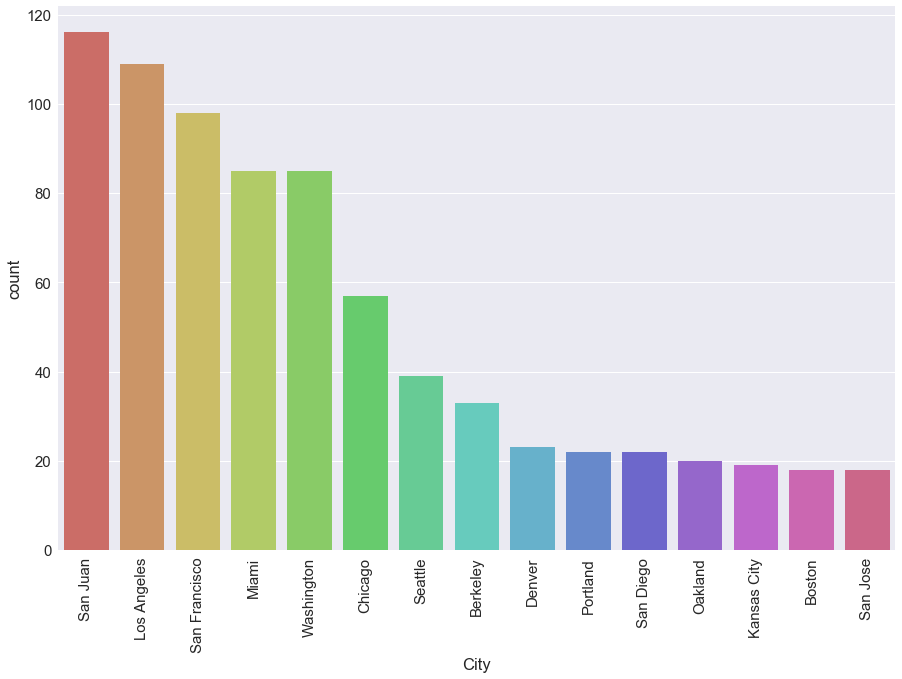

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x='City', data=us, palette='hls',order=us['City'].value_counts()[1:16].index)
plt.xticks(rotation=90)

# Most active terror group in United States of America

Text(0.5,0,'Terrorist group name')

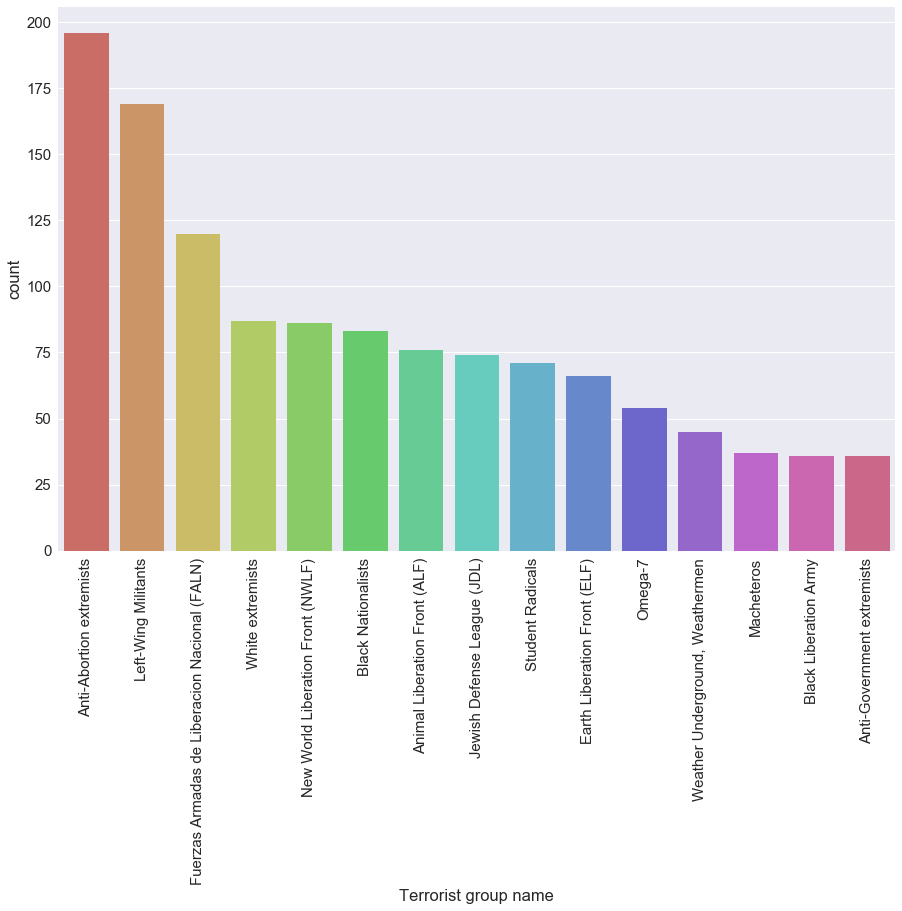

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x='Terrorist Group', data=us, palette='hls',order=us['Terrorist Group'].value_counts()[1:16].index)
plt.xticks(rotation=90)
plt.xlabel('Terrorist group name')

# No of attacks in United Kingdom

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

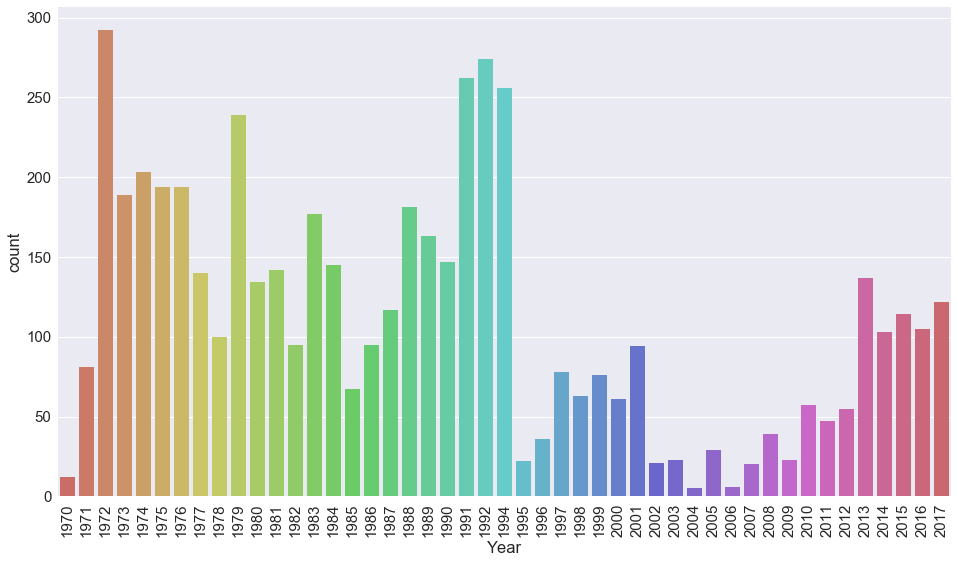

In [50]:
uk= df[df['Country']=='United Kingdom']
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=uk, palette='hls')
plt.xticks(rotation=90)

# Most affected city in United Kingdom

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

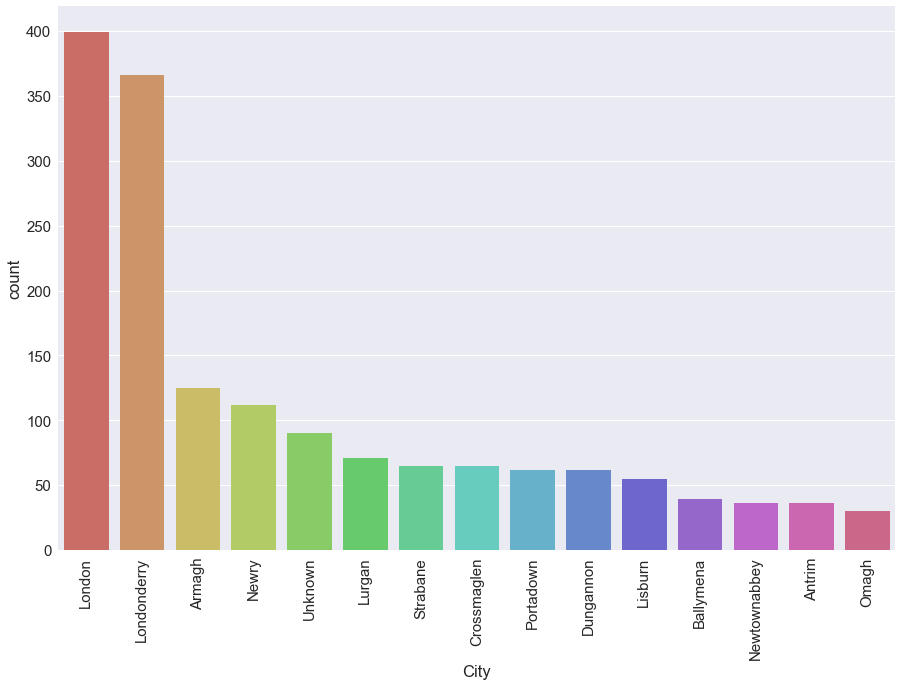

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(x='City', data=uk, palette='hls',order=uk['City'].value_counts()[1:16].index)
plt.xticks(rotation=90)

# Most active terror group in United Kingdom

Text(0.5,0,'Terrorist group name')

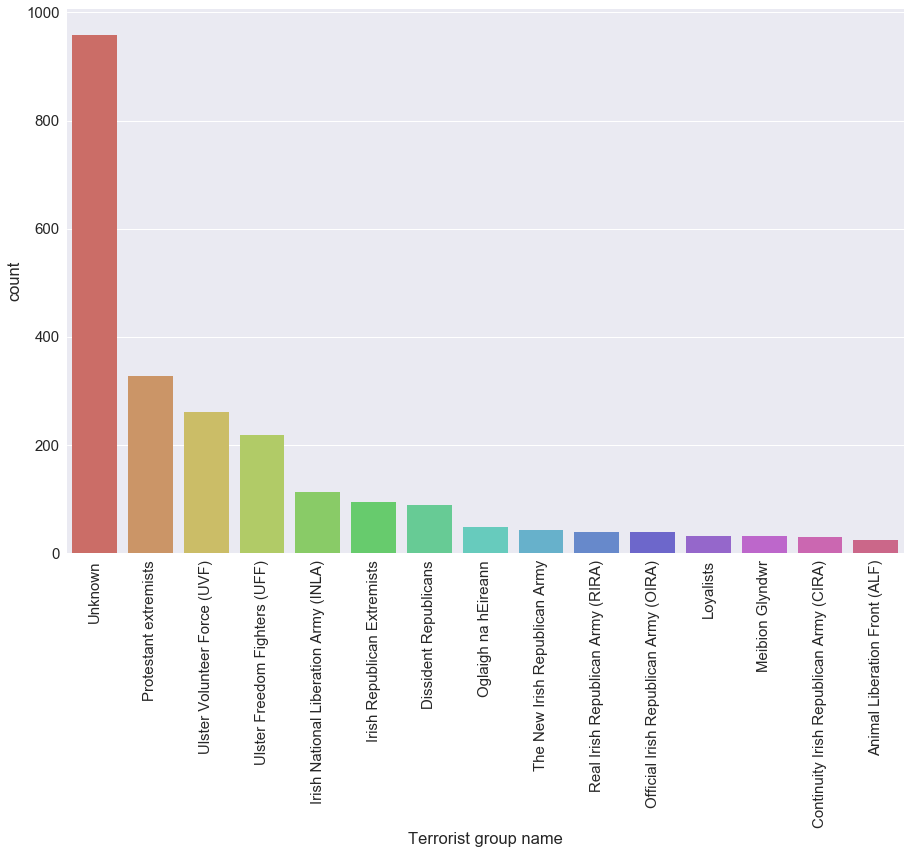

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='Terrorist Group', data=uk, palette='hls',order=uk['Terrorist Group'].value_counts()[1:16].index)
plt.xticks(rotation=90)
plt.xlabel('Terrorist group name')

# No of attacks in Russia

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

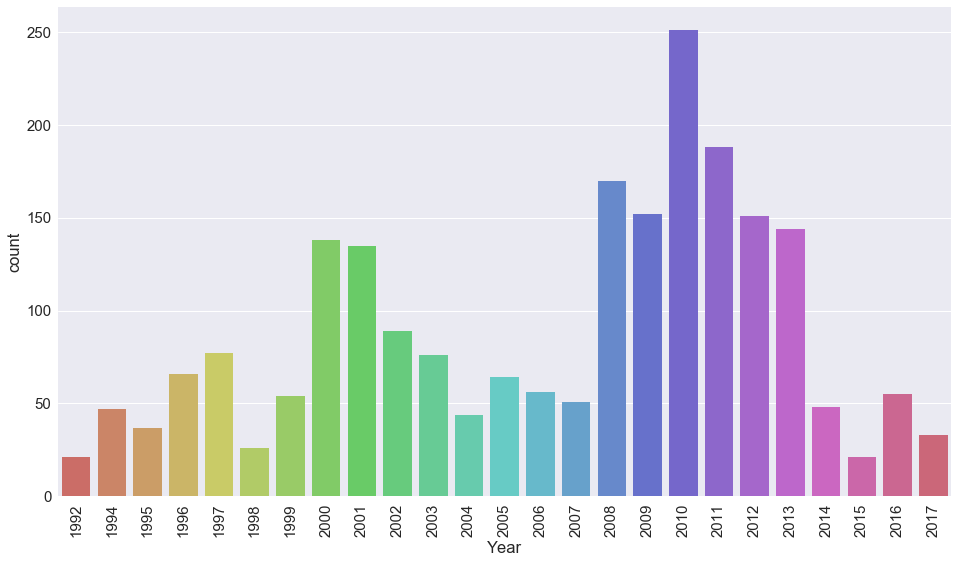

In [52]:
ussr= df[df['Country']=='Russia']
plt.figure(figsize=(16,9))
sns.countplot(x='Year', data=ussr, palette='hls')
plt.xticks(rotation=90)

# Most Affected City in Russia

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

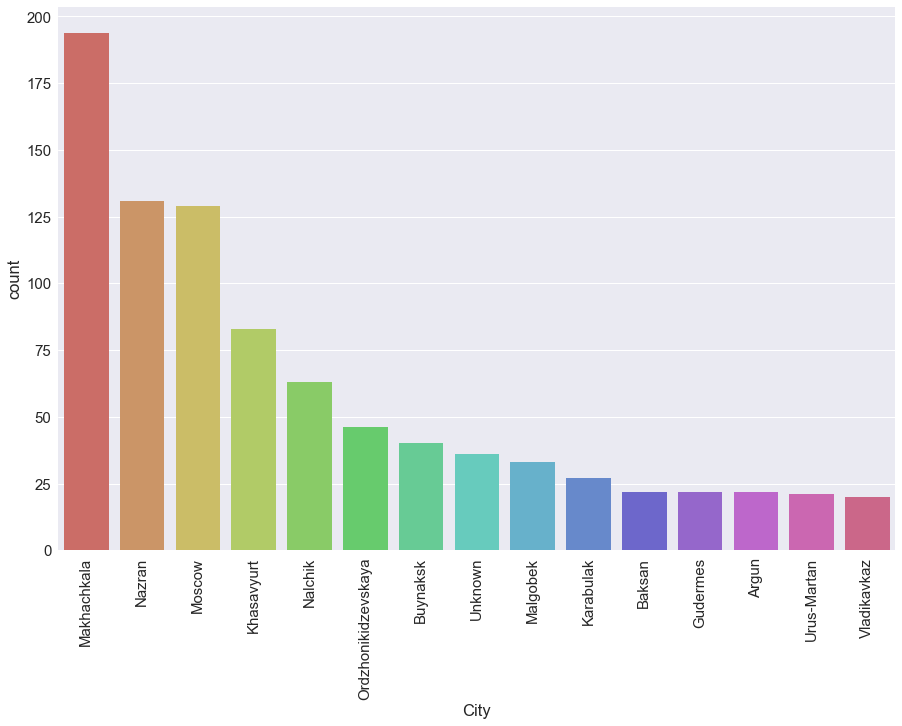

In [66]:
plt.figure(figsize=(15,10))
sns.countplot(x='City', data=ussr, palette='hls',order=ussr['City'].value_counts()[1:16].index)
plt.xticks(rotation=90)

# Most active terror group in Russia

Text(0.5,0,'Terrorist group name')

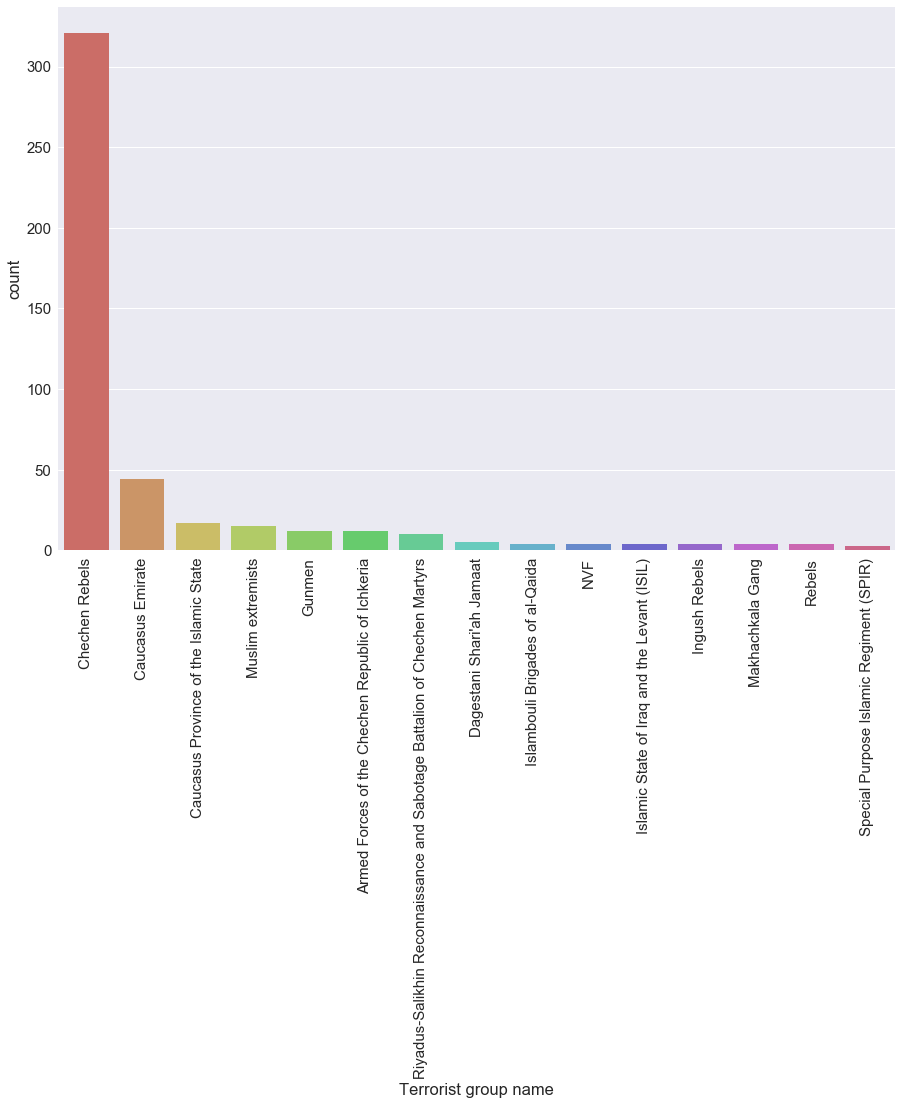

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(x='Terrorist Group', data=ussr, palette='hls',order=ussr['Terrorist Group'].value_counts()[1:16].index)
plt.xticks(rotation=90)
plt.xlabel('Terrorist group name')